In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd

In [2]:
# file uploaded
df_jan_path = "C:\\Users\\debas\\Uber demand Prediction/Data/yellow_tripdata_2016-01.csv"
df_feb_path = "C:\\Users\\debas\\Uber demand Prediction/Data/yellow_tripdata_2016-02.csv"
df_mar_path = "C:\\Users\\debas\\Uber demand Prediction/Data/yellow_tripdata_2016-03.csv"

In [3]:
df_jan = dd.read_csv(df_jan_path,assume_missing=True,usecols = ['trip_distance','pickup_longitude','pickup_latitude',
                                                                'dropoff_longitude','dropoff_latitude','fare_amount'])
df_feb = dd.read_csv(df_feb_path,assume_missing=True,usecols = ['trip_distance','pickup_longitude','pickup_latitude',
                                                                'dropoff_longitude','dropoff_latitude','fare_amount'])
df_mar = dd.read_csv(df_mar_path,assume_missing=True,usecols = ['trip_distance','pickup_longitude','pickup_latitude',
                                                                'dropoff_longitude','dropoff_latitude','fare_amount'])

In [4]:
df_jan

,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount
npartitions=26,,,,,,
,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...
...,...,...,...,...,...,...
,...,...,...,...,...,...
,...,...,...,...,...,...


In [5]:
# concat the three dataframes as one 

df_final = dd.concat([df_jan,df_feb,df_mar],axis = 0)

In [6]:
# set the values of coordinate

min_latitude = 40.60
max_latitude = 40.85
min_longitude = -74.05
max_longitude = -73.70


In [7]:
# fare amount column
fare_amount = df_final["fare_amount"].compute()

# trip distance column
trip_distance = df_final["trip_distance"].compute()



In [8]:
print(fare_amount)
print(trip_distance)

0          7.5
1         18.0
2         33.0
3         16.5
4          8.0
          ... 
420272    19.0
420273     4.0
420274    52.0
420275    42.5
420276    52.0
Name: fare_amount, Length: 34499859, dtype: float64
0          1.10
1          4.90
2         10.54
3          4.75
4          1.76
          ...  
420272     0.00
420273     0.40
420274    20.20
420275    15.40
420276    17.50
Name: trip_distance, Length: 34499859, dtype: float64


In [9]:
fare_amount.shape[0] / 10000000

3.4499859

In [10]:
# percentile values for fare amount 

percentile_values = np.arange(0.991,1.000,0.001)
percentile_values

array([0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999,
       1.   ])

In [11]:
fare_amount.quantile(percentile_values)

0.991        52.00
0.992        52.00
0.993        52.00
0.994        52.00
0.995        54.00
0.996        58.50
0.997        63.00
0.998        69.00
0.999        81.00
1.000    429496.72
Name: fare_amount, dtype: float64

In [12]:
max_fare_amount_val = fare_amount.quantile(percentile_values).iloc[-2].item()
min_fare_amount_val = 0.50

print(min_fare_amount_val)
print(max_fare_amount_val)

0.5
81.0


In [13]:
trip_distance.quantile(percentile_values)

0.991          18.80
0.992          19.00
0.993          19.30
0.994          19.63
0.995          20.04
0.996          20.51
0.997          21.10
0.998          21.90
0.999          24.43
1.000    19072628.80
Name: trip_distance, dtype: float64

In [14]:
# percentile value for trip distance

min_trip_distance_val = 0.25
max_trip_distance_val = trip_distance.quantile(percentile_values).iloc[-2].item()

print(min_trip_distance_val)
print(max_trip_distance_val)

0.25
24.43


In [15]:
# select data points with the given ranges

df_final = df_final.loc[(df_final["pickup_latitude"].between(min_latitude,max_latitude,inclusive = 'both'))&
                         (df_final["pickup_longitude"].between(min_longitude,max_longitude,inclusive='both'))&
                         (df_final["dropoff_latitude"].between(min_latitude,max_latitude,inclusive='both'))&
                          (df_final["dropoff_longitude"].between(min_longitude,max_longitude,inclusive='both')),:]

In [16]:
df_final = df_final.loc[(df_final['fare_amount'].between(min_fare_amount_val,max_fare_amount_val,inclusive='both')) &
                         (df_final['trip_distance'].between(min_trip_distance_val,max_trip_distance_val,inclusive='both'))]

In [17]:
# make a subset of location based columns

location_subset = df_final[['pickup_latitude','pickup_longitude',
                           'dropoff_latitude','dropoff_longitude']]

location_subset

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
npartitions=82,,,,
,float64,float64,float64,float64
,...,...,...,...
...,...,...,...,...
,...,...,...,...
,...,...,...,...


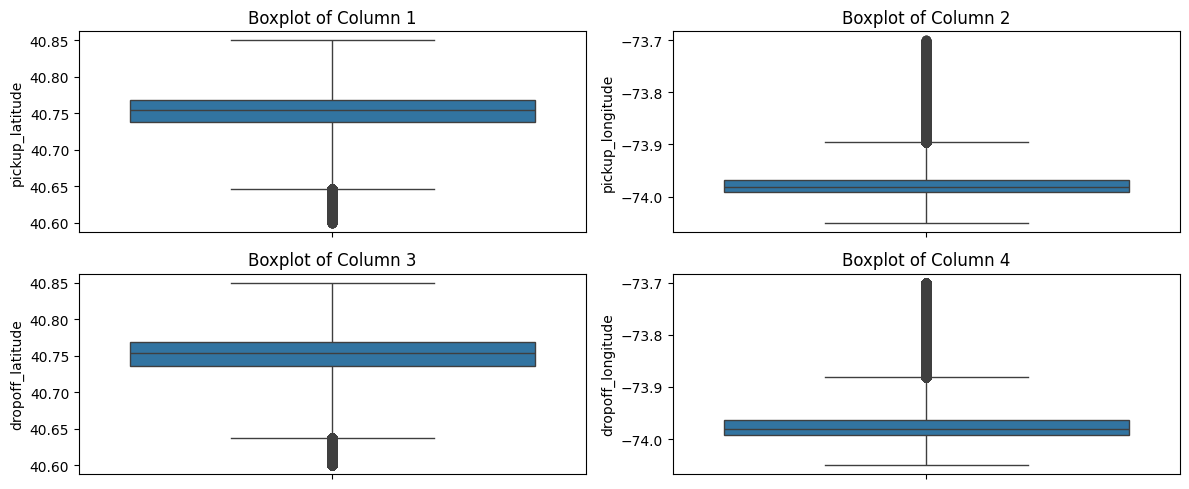

In [18]:
# boxplots for location based columns

import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 5))

# Flatten the 2D axes array into 1D for easy iteration
axes = axes.flatten()

# Loop through the first 4 columns of location_subset
for i in range(4):
    sns.boxplot(y=location_subset.iloc[:, i].compute(), ax=axes[i], whis=3)
    axes[i].set_title(f"Boxplot of Column {i+1}")

plt.tight_layout()
plt.show()


<Axes: ylabel='trip_distance'>

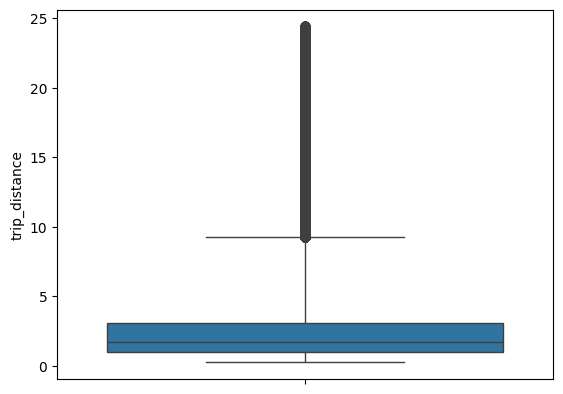

In [19]:
# trip distance

sns.boxplot(df_final.loc[:,"trip_distance"].compute(),whis=3)

<Axes: ylabel='fare_amount'>

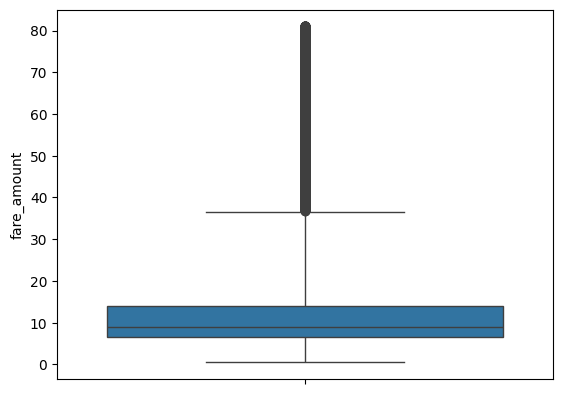

In [21]:
#fare amount

sns.boxplot(df_final.loc[:,"fare_amount"].compute(),whis=3)


In [22]:
# from the data set

pickup_coord_dataset = df_final.loc[:,['pickup_latitude','pickup_longitude']].compute()

print("shape of the dataset :",pickup_coord_dataset.shape)

shape of the dataset : (33234199, 2)


In [23]:
pickup_coord_dataset

,pickup_latitude,pickup_longitude
0,40.734695,-73.990372
1,40.729912,-73.980782
2,40.679565,-73.984550
3,40.718990,-73.993469
4,40.781330,-73.960625
...,...,...
420269,40.644451,-73.790565
420270,40.641483,-73.788055
420271,40.646736,-73.789154
420273,40.774471,-73.977356


In [25]:
# save path
save_path = "C:\\Users\\debas\\Uber demand Prediction/Data/location_data.csv"

In [26]:
# save the data set
pickup_coord_dataset.to_csv(save_path,index = False)